In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib
import pandas as pd


In [24]:
RUTA = pathlib.Path(__vsc_ipynb_file__).parent.parent # type: ignore

creditcard_data = pd.read_csv(f"{RUTA}/data/FraudulentECoomerce5.csv", encoding='latin1', sep=',', on_bad_lines='skip')
creditcard_data.shape

(1999899, 22)

In [25]:
creditcard_data.head(5)

,Amount,Errors,Is_Fraud,Gender,Direccion,Ciudad,IngresoPerCapita,IngresoAnual,DebitoTotal,FICO_Score,...,Day,Dia_Semana,Time,BancoCredito,TipoTarjeta,LimiteCredito,Merchant_Name,Merchant_City,Merchant_State,Zip
0,11473,SIN ERROR,0,Male,3385 Hill Lane,Burke,35563,72510,44317,727,...,2,Miércoles,17:30:00.0000000,Amex,Credit,33900,-7269691894846892021,Burke,VA,220150
1,-9900,SIN ERROR,0,Male,3385 Hill Lane,Burke,35563,72510,44317,727,...,20,Domingo,06:40:00.0000000,Amex,Credit,33900,1799189980464955940,Burke,VA,220150
2,13029,SIN ERROR,0,Male,3385 Hill Lane,Burke,35563,72510,44317,727,...,29,Martes,10:39:00.0000000,Amex,Credit,33900,1913477460590765860,Vienna,VA,221820
3,5500,SIN ERROR,0,Male,3385 Hill Lane,Burke,35563,72510,44317,727,...,17,Domingo,07:07:00.0000000,Amex,Credit,33900,2027553650310142703,Burke,VA,220150
4,1167,SIN ERROR,0,Male,3385 Hill Lane,Burke,35563,72510,44317,727,...,18,Lunes,11:15:00.0000000,Amex,Credit,33900,7069584154815291371,Burke,VA,220150


In [26]:
creditcard_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999899 entries, 0 to 1999898
Data columns (total 22 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   Amount            int64 
 1   Errors            object
 2   Is_Fraud          int64 
 3   Gender            object
 4   Direccion         object
 5   Ciudad            object
 6   IngresoPerCapita  int64 
 7   IngresoAnual      int64 
 8   DebitoTotal       int64 
 9   FICO_Score        int64 
 10  Year              int64 
 11  Month             int64 
 12  Day               int64 
 13  Dia_Semana        object
 14  Time              object
 15  BancoCredito      object
 16  TipoTarjeta       object
 17  LimiteCredito     int64 
 18  Merchant_Name     int64 
 19  Merchant_City     object
 20  Merchant_State    object
 21  Zip               int64 
dtypes: int64(12), object(10)
memory usage: 335.7+ MB


In [27]:
creditcard_data.describe()

,Amount,Is_Fraud,IngresoPerCapita,IngresoAnual,DebitoTotal,FICO_Score,Year,Month,Day,LimiteCredito,Merchant_Name,Zip
count,1.999899e+06,1.999899e+06,1.999899e+06,1.999899e+06,1.999899e+06,1.999899e+06,1.999899e+06,1.999899e+06,1.999899e+06,1.999899e+06,1.999899e+06,1.999899e+06
mean,4.360559e+03,1.252563e-03,2.395608e+04,4.661556e+04,5.850282e+04,7.124121e+02,2.011960e+03,6.525957e+00,1.571410e+01,1.525499e+04,-4.833573e+17,4.492072e+05
std,8.173666e+03,3.536941e-02,1.189533e+04,2.446291e+04,5.261724e+04,6.704140e+01,5.105749e+00,3.470710e+00,8.795411e+00,1.217587e+04,4.761139e+18,3.212435e+05
min,-5.000000e+04,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,4.800000e+02,1.991000e+03,1.000000e+00,1.000000e+00,0.000000e+00,-9.222899e+18,0.000000e+00
25%,9.220000e+02,0.000000e+00,1.694200e+04,3.271600e+04,1.728600e+04,6.830000e+02,2.008000e+03,3.000000e+00,8.000000e+00,7.688000e+03,-4.522165e+18,1.622900e+05
50%,3.020000e+03,0.000000e+00,2.115600e+04,4.084800e+04,5.167900e+04,7.140000e+02,2.013000e+03,7.000000e+00,1.600000e+01,1.332500e+04,-7.948098e+17,4.074000e+05
75%,6.509000e+03,0.000000e+00,2.754400e+04,5.401300e+04,8.493500e+04,7.550000e+02,2.016000e+03,1.000000e+01,2.300000e+01,2.031800e+04,3.189517e+18,7.522700e+05
max,4.351560e+05,1.000000e+00,1.631450e+05,3.070180e+05,5.162630e+05,8.500000e+02,2.020000e+03,1.200000e+01,3.100000e+01,1.512230e+05,9.222877e+18,9.992800e+05


In [29]:
#Evaluar columans erroneous
missing_values = creditcard_data.isnull().sum()
print("Valores faltantes por columna:")
print(missing_values)

Valores faltantes por columna:
Amount              0
Errors              0
Is_Fraud            0
Gender              0
Direccion           0
Ciudad              0
IngresoPerCapita    0
IngresoAnual        0
DebitoTotal         0
FICO_Score          0
Year                0
Month               0
Day                 0
Dia_Semana          0
Time                0
BancoCredito        0
TipoTarjeta         0
LimiteCredito       0
Merchant_Name       0
Merchant_City       0
Merchant_State      0
Zip                 0
dtype: int64


In [30]:

# Eliminar columnas innecesarias
# ==============================================================================
creditcard_data = creditcard_data.drop(columns=['Direccion'])
creditcard_data = creditcard_data.drop(columns=['Day'])
creditcard_data = creditcard_data.drop(columns=['Merchant_Name'])
creditcard_data = creditcard_data.drop(columns=['Merchant_City'])
creditcard_data = creditcard_data.drop(columns=['Merchant_State'])
creditcard_data = creditcard_data.drop(columns=['Zip'])
creditcard_data = creditcard_data.drop(columns=['Ciudad'])
creditcard_data.head(8)


,Amount,Errors,Is_Fraud,Gender,IngresoPerCapita,IngresoAnual,DebitoTotal,FICO_Score,Year,Month,Dia_Semana,Time,BancoCredito,TipoTarjeta,LimiteCredito
0,11473,SIN ERROR,0,Male,35563,72510,44317,727,1991,1,Miércoles,17:30:00.0000000,Amex,Credit,33900
1,-9900,SIN ERROR,0,Male,35563,72510,44317,727,1991,1,Domingo,06:40:00.0000000,Amex,Credit,33900
2,13029,SIN ERROR,0,Male,35563,72510,44317,727,1991,1,Martes,10:39:00.0000000,Amex,Credit,33900
3,5500,SIN ERROR,0,Male,35563,72510,44317,727,1991,2,Domingo,07:07:00.0000000,Amex,Credit,33900
4,1167,SIN ERROR,0,Male,35563,72510,44317,727,1991,2,Lunes,11:15:00.0000000,Amex,Credit,33900
5,995,SIN ERROR,0,Male,35563,72510,44317,727,1991,3,Sábado,18:03:00.0000000,Amex,Credit,33900
6,9350,SIN ERROR,0,Male,35563,72510,44317,727,1991,3,Martes,14:00:00.0000000,Amex,Credit,33900
7,1756,SIN ERROR,0,Male,35563,72510,44317,727,1991,3,Sábado,12:04:00.0000000,Amex,Credit,33900


In [ ]:
creditcard_data['Errors'].unique()

array(['SIN ERROR', 'Insufficient Balance', 'Technical Glitch', 'Bad PIN',
       'Bad Card Number', 'Bad CVV', 'Bad Expiration', 'Bad Zipcode'],
      dtype=object)

In [ ]:

#Aplicando encoding OHE a la acolumna ERRORS

from sklearn.preprocessing import OneHotEncoder

# Asumiendo que df es tu DataFrame y 'Errors' es la columna que quieres codificar
one_hot_encoder = OneHotEncoder(sparse=False)
errors_encoded = one_hot_encoder.fit_transform(creditcard_data[['Errors']])

# Crear un DataFrame con los resultados
errors_encoded_creditcard_data = pd.DataFrame(errors_encoded, columns=one_hot_encoder.get_feature_names_out(['Errors']))

# Concatenar el DataFrame original con el DataFrame codificado
creditcard_data = pd.concat([creditcard_data, errors_encoded_creditcard_data], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
creditcard_data.head(5)

,Amount,Errors,Is_Fraud,Gender,IngresoPerCapita,IngresoAnual,DebitoTotal,FICO_Score,Year,Month,...,TipoTarjeta,LimiteCredito,Errors_Bad CVV,Errors_Bad Card Number,Errors_Bad Expiration,Errors_Bad PIN,Errors_Bad Zipcode,Errors_Insufficient Balance,Errors_SIN ERROR,Errors_Technical Glitch
0,11473,SIN ERROR,0,Male,35563,72510,44317,727,1991,1,...,Credit,33900,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-9900,SIN ERROR,0,Male,35563,72510,44317,727,1991,1,...,Credit,33900,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,13029,SIN ERROR,0,Male,35563,72510,44317,727,1991,1,...,Credit,33900,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,5500,SIN ERROR,0,Male,35563,72510,44317,727,1991,2,...,Credit,33900,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1167,SIN ERROR,0,Male,35563,72510,44317,727,1991,2,...,Credit,33900,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
creditcard_data['BancoCredito'].unique()

array(['Amex', 'Mastercard', 'Visa', 'Discover'], dtype=object)

In [ ]:
#Aplicando encoding OHE a la acolumna BancoCRedito

one_hot_encoder = OneHotEncoder(sparse=False)
errors_encoded = one_hot_encoder.fit_transform(creditcard_data[['BancoCredito']])

errors_encoded_creditcard_data = pd.DataFrame(errors_encoded, columns=one_hot_encoder.get_feature_names_out(['BancoCredito']))

creditcard_data = pd.concat([creditcard_data, errors_encoded_creditcard_data], axis=1)
creditcard_data.head(5)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Amount,Errors,Is_Fraud,Gender,IngresoPerCapita,IngresoAnual,DebitoTotal,FICO_Score,Year,Month,...,Errors_Bad Expiration,Errors_Bad PIN,Errors_Bad Zipcode,Errors_Insufficient Balance,Errors_SIN ERROR,Errors_Technical Glitch,BancoCredito_Amex,BancoCredito_Discover,BancoCredito_Mastercard,BancoCredito_Visa
0,11473,SIN ERROR,0,Male,35563,72510,44317,727,1991,1,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,-9900,SIN ERROR,0,Male,35563,72510,44317,727,1991,1,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,13029,SIN ERROR,0,Male,35563,72510,44317,727,1991,1,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,5500,SIN ERROR,0,Male,35563,72510,44317,727,1991,2,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1167,SIN ERROR,0,Male,35563,72510,44317,727,1991,2,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
creditcard_data['TipoTarjeta'].unique()

array(['Credit', 'Debit', 'Debit (Prepaid)'], dtype=object)

In [ ]:
# Encoding a las variables de la columna TipoTarjeta

one_hot_encoder = OneHotEncoder(sparse=False)
encoded = one_hot_encoder.fit_transform(creditcard_data[['TipoTarjeta']])

encoded_creditcard_data = pd.DataFrame(encoded, columns=one_hot_encoder.get_feature_names_out(['TipoTarjeta']))

creditcard_data = pd.concat([creditcard_data, encoded_creditcard_data], axis=1)
creditcard_data.head(5)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Amount,Errors,Is_Fraud,Gender,IngresoPerCapita,IngresoAnual,DebitoTotal,FICO_Score,Year,Month,...,Errors_Insufficient Balance,Errors_SIN ERROR,Errors_Technical Glitch,BancoCredito_Amex,BancoCredito_Discover,BancoCredito_Mastercard,BancoCredito_Visa,TipoTarjeta_Credit,TipoTarjeta_Debit,TipoTarjeta_Debit (Prepaid)
0,11473,SIN ERROR,0,Male,35563,72510,44317,727,1991,1,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-9900,SIN ERROR,0,Male,35563,72510,44317,727,1991,1,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,13029,SIN ERROR,0,Male,35563,72510,44317,727,1991,1,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,5500,SIN ERROR,0,Male,35563,72510,44317,727,1991,2,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1167,SIN ERROR,0,Male,35563,72510,44317,727,1991,2,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
creditcard_data['Dia_Semana'].unique()

array(['Miércoles', 'Domingo', 'Martes', 'Lunes', 'Sábado', 'Jueves',
       'Viernes'], dtype=object)

In [ ]:
# Encoding a las variables de la columna Dia_Semana

one_hot_encoder = OneHotEncoder(sparse=False)
encoded = one_hot_encoder.fit_transform(creditcard_data[['Dia_Semana']])

encoded_creditcard_data = pd.DataFrame(encoded, columns=one_hot_encoder.get_feature_names_out(['Dia_Semana']))

creditcard_data = pd.concat([creditcard_data, encoded_creditcard_data], axis=1)
creditcard_data.head(5)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Amount,Errors,Is_Fraud,Gender,IngresoPerCapita,IngresoAnual,DebitoTotal,FICO_Score,Year,Month,...,TipoTarjeta_Credit,TipoTarjeta_Debit,TipoTarjeta_Debit (Prepaid),Dia_Semana_Domingo,Dia_Semana_Jueves,Dia_Semana_Lunes,Dia_Semana_Martes,Dia_Semana_Miércoles,Dia_Semana_Sábado,Dia_Semana_Viernes
0,11473,SIN ERROR,0,Male,35563,72510,44317,727,1991,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-9900,SIN ERROR,0,Male,35563,72510,44317,727,1991,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,13029,SIN ERROR,0,Male,35563,72510,44317,727,1991,1,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,5500,SIN ERROR,0,Male,35563,72510,44317,727,1991,2,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1167,SIN ERROR,0,Male,35563,72510,44317,727,1991,2,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
#Convirtiendo la columan time a un valor numerico
from sklearn.preprocessing import LabelEncoder, StandardScaler

creditcard_data['Time'] = pd.to_datetime(creditcard_data['Time'], format='%H:%M:%S.%f')
creditcard_data['Time'] = creditcard_data['Time'].dt.hour * 60 + creditcard_data['Time'].dt.minute

# Codificar la columna categórica

label_encoder = LabelEncoder()
creditcard_data['Time'] = label_encoder.fit_transform(creditcard_data['Time'])

# Estandarizar la columna 'ti_seconds'

scaler = StandardScaler()
creditcard_data['Time'] = scaler.fit_transform(creditcard_data[['Time']])


In [ ]:
null_counts = creditcard_data.isnull().sum()
print(null_counts)

Amount                         0
Errors                         0
Is_Fraud                       0
Gender                         0
IngresoPerCapita               0
IngresoAnual                   0
DebitoTotal                    0
FICO_Score                     0
Year                           0
Month                          0
Dia_Semana                     0
Time                           0
BancoCredito                   0
TipoTarjeta                    0
LimiteCredito                  0
Errors_Bad CVV                 0
Errors_Bad Card Number         0
Errors_Bad Expiration          0
Errors_Bad PIN                 0
Errors_Bad Zipcode             0
Errors_Insufficient Balance    0
Errors_SIN ERROR               0
Errors_Technical Glitch        0
BancoCredito_Amex              0
BancoCredito_Discover          0
BancoCredito_Mastercard        0
BancoCredito_Visa              0
TipoTarjeta_Credit             0
TipoTarjeta_Debit              0
TipoTarjeta_Debit (Prepaid)    0
Dia_Semana

In [ ]:


#Borrar columman codificadas
creditcard_data = creditcard_data.drop(columns=['Errors'])
creditcard_data = creditcard_data.drop(columns=['Gender'])
creditcard_data = creditcard_data.drop(columns=['Dia_Semana'])
creditcard_data = creditcard_data.drop(columns=['BancoCredito'])
creditcard_data = creditcard_data.drop(columns=['TipoTarjeta'])

In [ ]:
creditcard_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999899 entries, 0 to 1999898
Data columns (total 32 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Amount                       int64  
 1   Is_Fraud                     int64  
 2   IngresoPerCapita             int64  
 3   IngresoAnual                 int64  
 4   DebitoTotal                  int64  
 5   FICO_Score                   int64  
 6   Year                         int64  
 7   Month                        int64  
 8   Time                         float64
 9   LimiteCredito                int64  
 10  Errors_Bad CVV               float64
 11  Errors_Bad Card Number       float64
 12  Errors_Bad Expiration        float64
 13  Errors_Bad PIN               float64
 14  Errors_Bad Zipcode           float64
 15  Errors_Insufficient Balance  float64
 16  Errors_SIN ERROR             float64
 17  Errors_Technical Glitch      float64
 18  BancoCredito_Amex            float64
 19  

In [ ]:
# prompt: eliminar las filas que tienen datos negativos de la columna Amount

# Eliminar filas con Amount negativo
creditcard_data = creditcard_data[creditcard_data['Amount'] >= 0]


In [ ]:
creditcard_data.info()
null_counts = creditcard_data.isnull().sum()
print(null_counts)

<class 'pandas.core.frame.DataFrame'>
Index: 1898346 entries, 0 to 1999898
Data columns (total 32 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Amount                       int64  
 1   Is_Fraud                     int64  
 2   IngresoPerCapita             int64  
 3   IngresoAnual                 int64  
 4   DebitoTotal                  int64  
 5   FICO_Score                   int64  
 6   Year                         int64  
 7   Month                        int64  
 8   Time                         float64
 9   LimiteCredito                int64  
 10  Errors_Bad CVV               float64
 11  Errors_Bad Card Number       float64
 12  Errors_Bad Expiration        float64
 13  Errors_Bad PIN               float64
 14  Errors_Bad Zipcode           float64
 15  Errors_Insufficient Balance  float64
 16  Errors_SIN ERROR             float64
 17  Errors_Technical Glitch      float64
 18  BancoCredito_Amex            float64
 19  Banco

In [ ]:
# prompt: guardar la variable creditcard_data como un archivo .csv

creditcard_data.to_csv('Data2.csv', index=False)


In [ ]:
data = pd.read_csv('Data2.csv')  # Reemplaza con la ruta a tu archivo de datos

# Separar 5 registros con Is_Fraud = 1
fraud_data = data[data['Is_Fraud'] == 1].sample(n=5, random_state=42)

# Separar 5 registros con Is_Fraud = 0
non_fraud_data = data[data['Is_Fraud'] == 0].sample(n=5, random_state=42)

# Combinar los datos separados en un nuevo DataFrame
verification_data = pd.concat([fraud_data, non_fraud_data])

# Guardar los datos separados en un nuevo archivo CSV
verification_data.to_csv('DatosVerificacion.csv', index=False)

# Eliminar los datos extraídos del DataFrame original
data = data.drop(fraud_data.index)
data = data.drop(non_fraud_data.index)

# Guardar el DataFrame original modificado si lo necesitas
data.to_csv('Data2.csv', index=False)

In [ ]:
verification_data.info()
null_counts = verification_data.isnull().sum()
print(null_counts)

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 1663326 to 208573
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Amount                       10 non-null     int64  
 1   Is_Fraud                     10 non-null     int64  
 2   IngresoPerCapita             10 non-null     int64  
 3   IngresoAnual                 10 non-null     int64  
 4   DebitoTotal                  10 non-null     int64  
 5   FICO_Score                   10 non-null     int64  
 6   Year                         10 non-null     int64  
 7   Month                        10 non-null     int64  
 8   Time                         10 non-null     float64
 9   LimiteCredito                10 non-null     int64  
 10  Errors_Bad CVV               10 non-null     float64
 11  Errors_Bad Card Number       10 non-null     float64
 12  Errors_Bad Expiration        10 non-null     float64
 13  Errors_Bad PIN   

In [ ]:
# Correlación entre columnas numéricas
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)

    return(corr_mat)



corr_matrix = creditcard_data.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
67,IngresoPerCapita,IngresoAnual,0.950324,0.950324
98,IngresoAnual,IngresoPerCapita,0.950324,0.950324
758,TipoTarjeta_Debit,TipoTarjeta_Credit,-0.860086,0.860086
727,TipoTarjeta_Credit,TipoTarjeta_Debit,-0.860086,0.860086
661,BancoCredito_Mastercard,BancoCredito_Visa,-0.821679,0.821679
692,BancoCredito_Visa,BancoCredito_Mastercard,-0.821679,0.821679
496,Errors_Insufficient Balance,Errors_SIN ERROR,-0.788276,0.788276
527,Errors_SIN ERROR,Errors_Insufficient Balance,-0.788276,0.788276
290,LimiteCredito,IngresoPerCapita,0.590097,0.590097
73,IngresoPerCapita,LimiteCredito,0.590097,0.590097


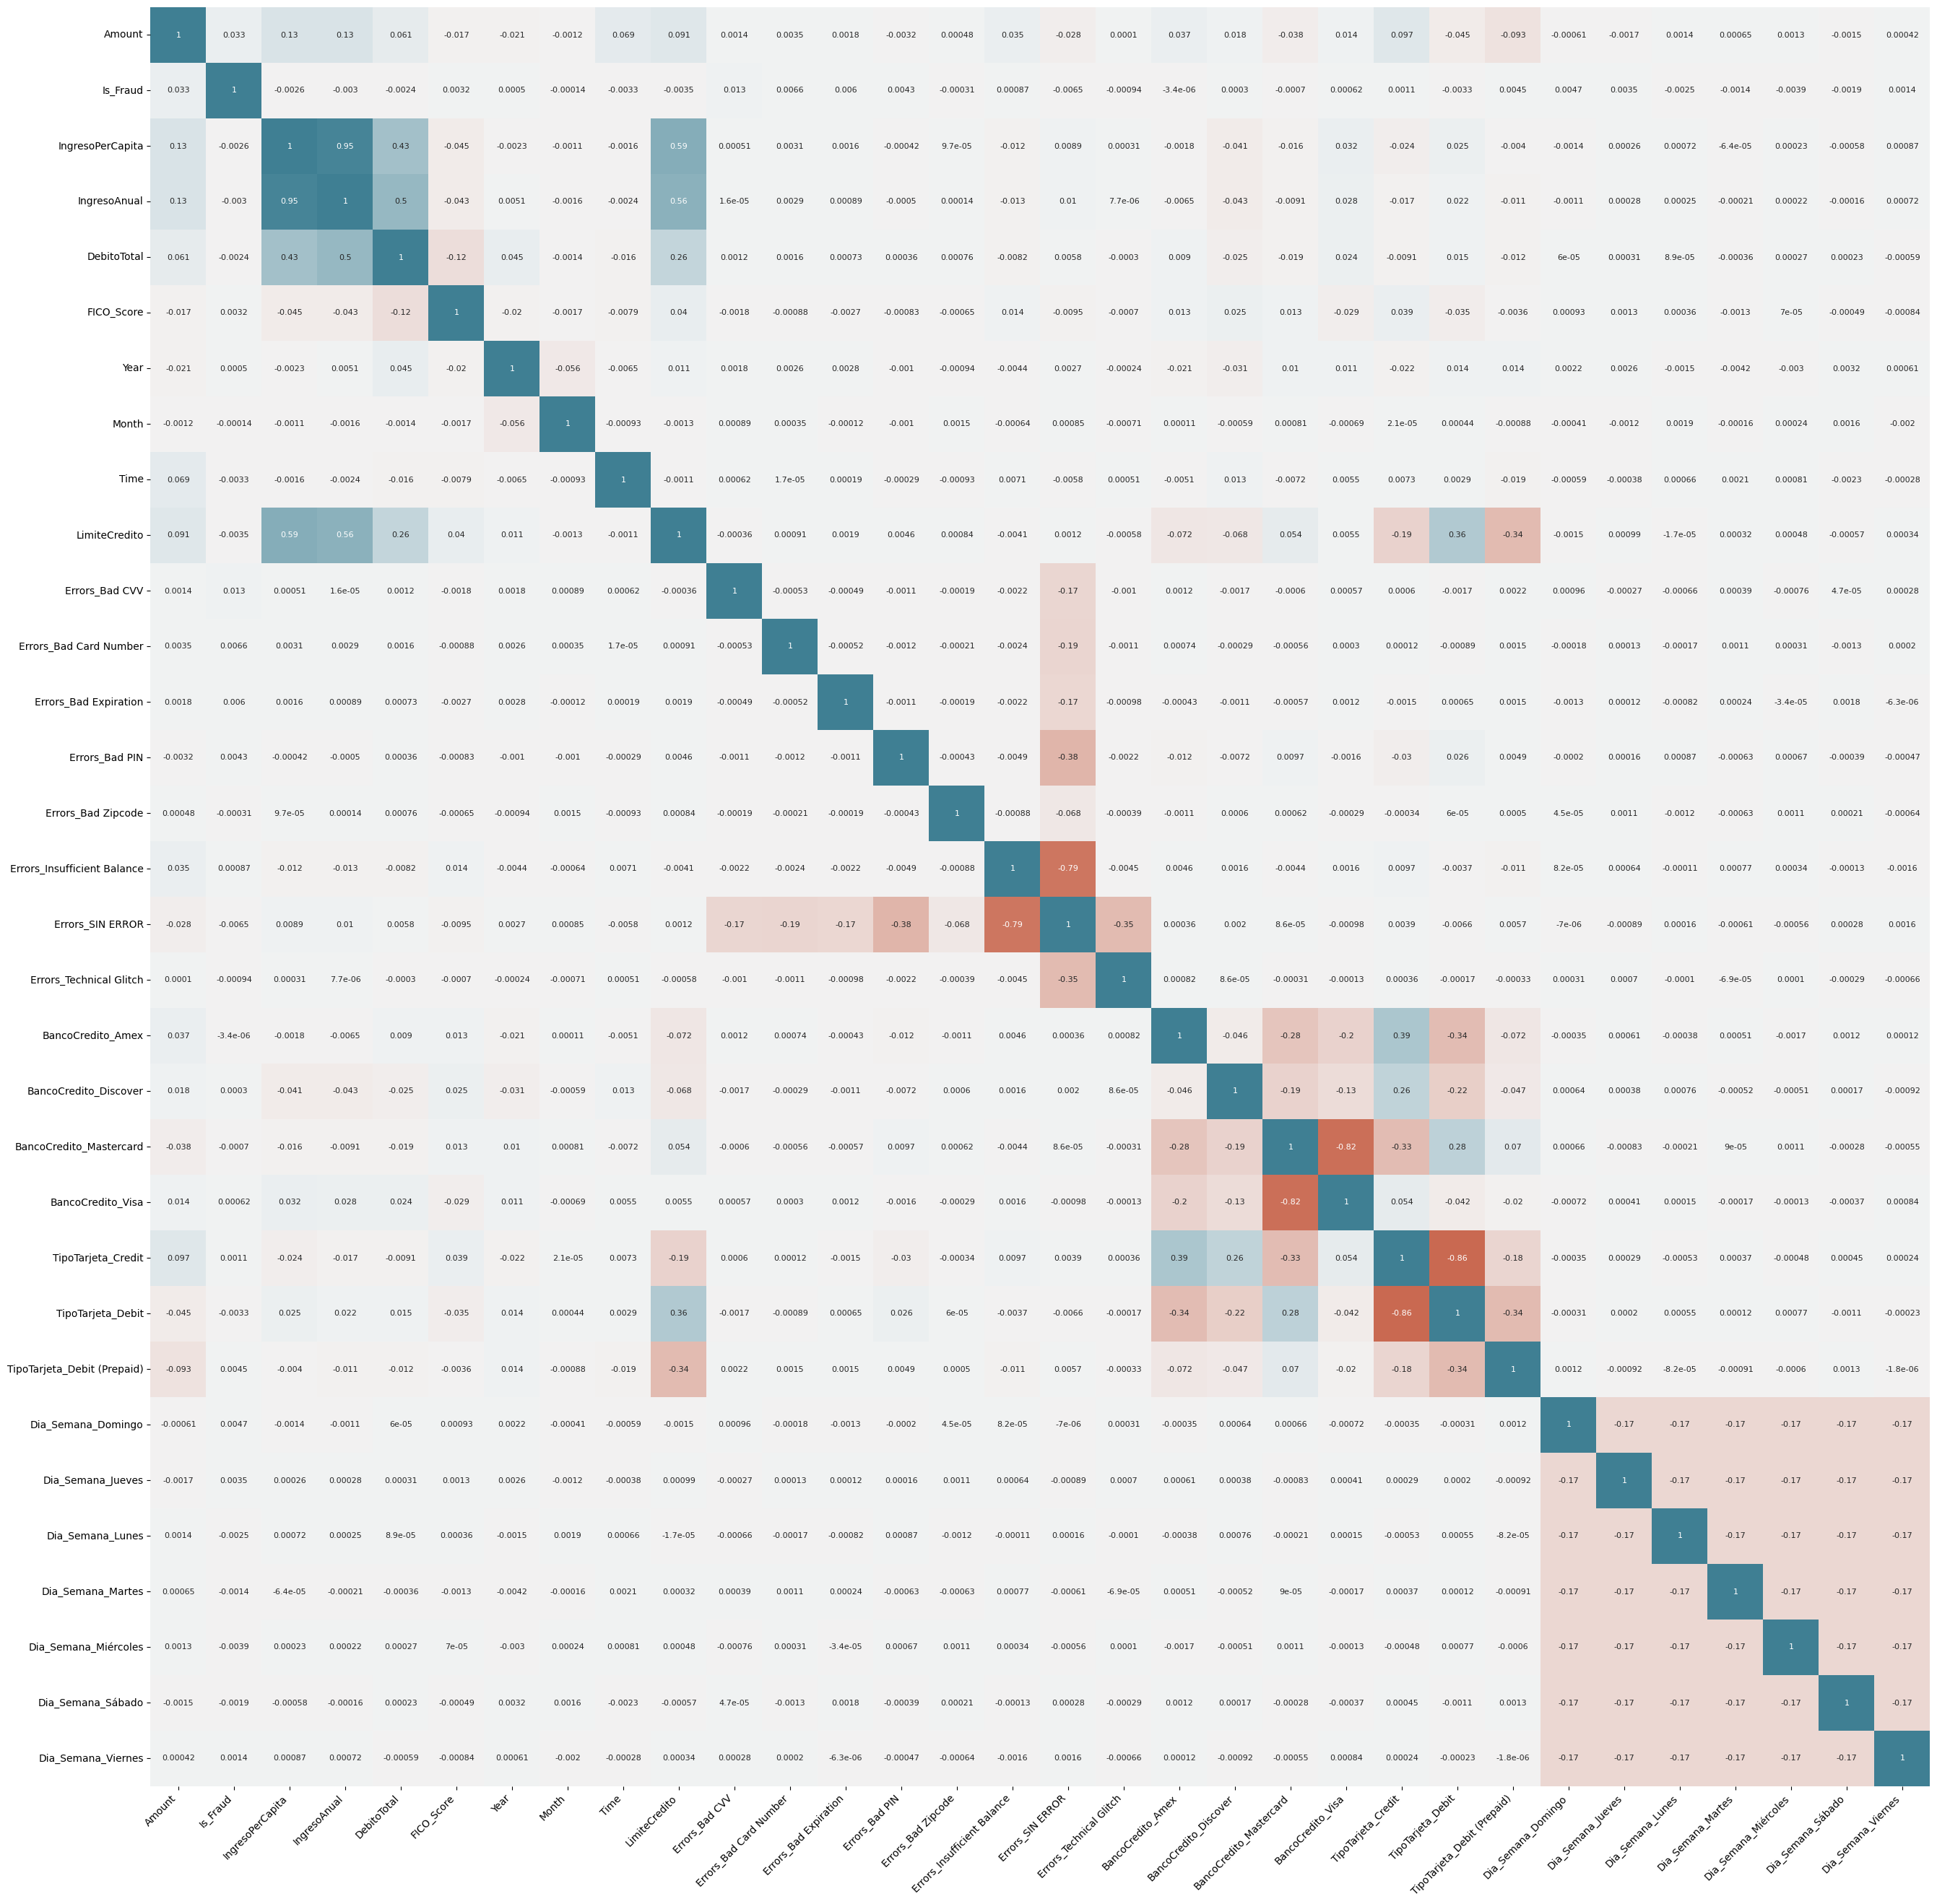

In [ ]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(32, 32))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)